<a href="https://colab.research.google.com/github/athiniotim/athiniotim/blob/main/Sentiment_analysis__forest_fires_athensvoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Κατέβασμα του λεξικού από την spacy**

In [3]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 94.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

# Διαβάζουμε το EmoLex

Το emolex (EMOtional LEXicon) είναι ένα λεξικό στο οποίο οι λέξεις που περιέχει έχουν αξιολογηθεί ως προς το συναισθηματικό φορτίο που μεταφέρουν.

Το λεξικό έχει δημιουργηθεί στην αγγλική γλώσσα και έχει μεταφραστεί σε 100 γλώσσες με google translate, μεταξύ των οποίων είναι και τα ελληνικά.

Μπορείτε να κατεβάσετε όλες τις γλώσσες από εδώ: http://www.saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

GREEK

In [8]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [9]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**drop_duplicates() και dropna()**

Με την εντολή ```drop_duplicates()``` αφαιρούμε τις γραμμές που έχουν ίδιο περιεχόμενο (κρατάμε μόνο την πρώτη). Με την παράμετρο ```subset=['word']``` ορίζουμε ότι θα αφαιρεθούν οι γραμμές που έχουν ίδιο περιεχόμενο **μόνο** στη στήλη ```word```.

Με την εντολή ```dropna()``` αφαιρούμε τις γραμμές που δεν έχουν τιμή σε οποιαδήποτε στήλη.

Με την εντολή ```reset_index``` κάνουμε επαναρίθμηση του index μετά την αφαίρεση γραμμών του df, ώστε η αρίθμηση να είναι συνεχής. Με την παράμετρο ```drop=True``` στο ```reset_index()``` πετάμε το παλιό index.

**Note**: Αν δεν βάλουμε την παράμετρο ```drop=True```, το παλιό index θα προστεθεί σαν στήλη στο df. Αυτό μπορεί να είναι χρήσιμο σε κάποιες περιπτώσεις, όπως θα δούμε και παρακάτω.

In [11]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [12]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import spacy

In [14]:
nlp = spacy.load('el_core_news_sm')

In [15]:
forest_fires_athensvoice_df = pd.read_csv("/content/gdrive/MyDrive/ΕΔΔΕ.2/fires_csv/forest_fires_articles/fire_athens_voice_articles_df.csv")

In [17]:
len(forest_fires_athensvoice_df)

749

In [16]:
forest_fires_athensvoice_df['date_dt'] = pd.to_datetime(forest_fires_athensvoice_df['date'], format='%Y-%m-%d')
forest_fires_athensvoice_df['time_dt'] = pd.to_datetime(forest_fires_athensvoice_df['time'], format='%H:%M:%S')
forest_fires_athensvoice_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
subtitle,object
text_body,object
feat_img_link,object


In [18]:
sa_forest_fires_athensvoice_df = forest_fires_athensvoice_df[(forest_fires_athensvoice_df['date_dt'] >= '2023-01-01') & (forest_fires_athensvoice_df['date_dt'] <= '2024-12-31')]

In [19]:
sa_forest_fires_athensvoice_df.head(5)

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link,date_dt,time_dt
100,https://www.athensvoice.gr/epikairotita/diethn...,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29,10:40:50,Κοσμος,Newsroom,Ουρανοξύστες και ναοί φτιαγμένοι από πάγο στο ...,Το πάρκο έχει έκταση ενός εκατομμυρίου τετραγω...,"Διάφορα κτίρια-ορόσημα του Χονγκ Κονγκ, του Μα...",https://www.athensvoice.gr/images/1074x600/jpg...,2024-12-29,1900-01-01 10:40:50
101,https://www.athensvoice.gr/epikairotita/diethn...,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27,11:26:13,Κοσμος,Newsroom,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,Φόβοι για την ασφάλεια των πτήσεων,Η Azerbaijan Airlines ανακοίνωσε ότι διακόπτει...,https://www.athensvoice.gr/images/1074x600/1/j...,2024-12-27,1900-01-01 11:26:13
102,https://www.athensvoice.gr/epikairotita/diethn...,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25,15:02:24,Κοσμος,Newsroom,Ο Ρώσος Πρόεδρος Βλαντιμίρ Πούτιν δήλωσε ότι κ...,Ο Βλαντιμίρ Πούτιν υποστηρίζει την εκτεταμένη ...,Εταιρείες στη Ρωσία ξεκίνησαν να χρησιμοποιούν...,https://www.athensvoice.gr/images/1074x600/1/j...,2024-12-25,1900-01-01 15:02:24
103,https://look.athensvoice.gr/look/opinions/8831...,NaN,2024-12-21,09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-21,1900-01-01 09:30:00
104,https://www.athensvoice.gr/life/geusi/themata/...,NaN,2024-12-20,16:17:06,NaN,NaN,Titania: αξέχαστες γιορτές σε ένα από τα πιο ε...,NaN,Η ομορφότερη εποχή του χρόνου έφτασε και η Αθή...,NaN,2024-12-20,1900-01-01 16:17:06


In [20]:
len(sa_forest_fires_athensvoice_df)

635

In [21]:
sa_forest_fires_athensvoice_df.loc[:, 'full_text'] = (
    sa_forest_fires_athensvoice_df['title'].fillna('') +
    ' ' +
    sa_forest_fires_athensvoice_df['subtitle'].fillna('') +
    ' ' +
    sa_forest_fires_athensvoice_df['excerpt'].fillna('') +
    ' ' +
    sa_forest_fires_athensvoice_df['text_body'].fillna('')
)

<ipython-input-21-d82eb3d5da2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_forest_fires_athensvoice_df.loc[:, 'full_text'] = (


In [22]:
short_sa_forest_fires_athensvoice_df = sa_forest_fires_athensvoice_df[['date_dt', "time_dt",'full_text' ]]
short_sa_forest_fires_athensvoice_df = short_sa_forest_fires_athensvoice_df.rename(columns={'full_text': 'text'} )
short_sa_forest_fires_athensvoice_df['time_dt'] = short_sa_forest_fires_athensvoice_df['time_dt'].dt.strftime('%H:%M:%S')

In [23]:
len(short_sa_forest_fires_athensvoice_df)

635

In [24]:
short_sa_forest_fires_athensvoice_df.head()

,date_dt,time_dt,text
100,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...
101,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...
102,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...
103,2024-12-21,09:30:00,
104,2024-12-20,16:17:06,Titania: αξέχαστες γιορτές σε ένα από τα πιο...


**Μετατρέπουμε το ```date``` σε ```datetime```**

In [25]:
short_sa_forest_fires_athensvoice_df.dtypes

,0
date_dt,datetime64[ns]
time_dt,object
text,object


In [26]:
short_sa_forest_fires_athensvoice_df['datetime'] = pd.to_datetime(
    short_sa_forest_fires_athensvoice_df['date_dt'].astype(str) + ' ' + short_sa_forest_fires_athensvoice_df['time_dt'],
    errors='coerce'
)

In [29]:
short_sa_forest_fires_athensvoice_df['datetime'] = pd.to_datetime(short_sa_forest_fires_athensvoice_df['datetime'], format='%Y-%m-%d %H:%M:%S')

In [30]:
short_sa_forest_fires_athensvoice_df.dtypes

,0
date_dt,datetime64[ns]
time_dt,object
text,object
datetime,datetime64[ns]


In [31]:
# εαν θέλουμε να πετάξουμε urls που μπορεί να υπάρχουν στο κείμενο
short_sa_forest_fires_athensvoice_df['text'] = short_sa_forest_fires_athensvoice_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [32]:
short_sa_forest_fires_athensvoice_df.head()

,date_dt,time_dt,text,datetime
100,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29 10:40:50
101,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27 11:26:13
102,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25 15:02:24
103,2024-12-21,09:30:00,,2024-12-21 09:30:00
104,2024-12-20,16:17:06,Titania: αξέχαστες γιορτές σε ένα από τα πιο...,2024-12-20 16:17:06


**Φτιάχνουμε έναν vectorizer από τις λέξεις του συναισθηματικού λεξικού**

In [33]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [34]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

**Μετράμε πόσες φορές εμφανίζονται οι λέξεις του συναισθηματικού λεξικού στα κείμενα των άρθρων**

Εφαρμόζουμε τον vectorizer στη στήλη ```text``` του df των άρθρων (matrix).

Από τον vectorizer φτιάχνουμε ένα λεξικό (vocab).

Φτιάχνουμε ένα df με στήλες τις λέξεις του λεξικού, γραμμές τα άρθρα και τιμές τη συχνότητα εμφάνισης της κάθε λέξεις στο κάθε κείμενο.

In [35]:
matrix = vec.fit_transform(short_sa_forest_fires_athensvoice_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
wordcount_df.shape

(635, 13161)

**Φτιάχνουμε λίστες με τις λέξεις για θετικότητα/αρνητικότητα και για κάθε συναίσθημα**

In [39]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

Οι λίστες που φτιάξαμε είναι της μορφής:

In [42]:
trust_words

,word
8,αμην
15,γαμηλιο ταξιδι
24,διευθυντρια σχολειου
38,επικοινωνω
45,εκκλησια
...,...
13039,αληθης
13075,αναμφιβολως
13079,ανυπερβατος
13113,αναθηματικος


Οι λέξεις/φράσεις της κάθε λίστας είναι ονόματα στηλών στο wordcount_df

In [43]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Αν εφαρμόσουμε τη λίστα με τις λέξεις/φράσεις ενός συναισθήματος σαν επιλογέα στηλών στο wordcount_df, μπορούμε να "φιλτράρουμε" μόνο αυτές τις συγκεκριμένες στήλες

In [44]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Αν στο τέλος προσθέσουμε την εντολή `sum(axis=1)` θα πάρουμε το άθροισμα των εμφανίσεων όλων των λέξεων/φράσεων ενός συναισθήματος σε κάθε άρθρο

In [45]:
wordcount_df[trust_words].sum(axis=1)

,0
0,0
1,1
2,5
3,0
4,4
...,...
630,19
631,6
632,1
633,4


**Στο df των άρθρων, δημιουργούμε νέες στήλες (μία για κάθε συναίσθημα) με τιμές το σύνολο των εμφανίσεων λέξεων/φράσεων κάθε συναισθήματος σε κάθε άρθρο**

Το df των άρθρων έχει την ημερομηνία και το κείμενο κάθε άρθρου.

In [46]:
short_sa_forest_fires_athensvoice_df.head(3)

,date_dt,time_dt,text,datetime
100,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29 10:40:50
101,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27 11:26:13
102,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25 15:02:24


Δημιουργούμε στήλες συναισθημάτων

In [47]:
short_sa_forest_fires_athensvoice_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_sa_forest_fires_athensvoice_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [48]:
short_sa_forest_fires_athensvoice_df

,date_dt,time_dt,text,datetime,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
100,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,2024-12-29 10:40:50,3.0,6.0,1.0,2.0,2.0,2.0,7.0,2.0,12.0,6.0
101,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2024-12-27 11:26:13,2.0,25.0,1.0,4.0,2.0,8.0,5.0,1.0,3.0,4.0
102,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,2024-12-25 15:02:24,5.0,3.0,0.0,1.0,0.0,3.0,2.0,1.0,6.0,6.0
103,2024-12-21,09:30:00,,2024-12-21 09:30:00,3.0,6.0,1.0,2.0,2.0,2.0,5.0,3.0,14.0,7.0
104,2024-12-20,16:17:06,Titania: αξέχαστες γιορτές σε ένα από τα πιο...,2024-12-20 16:17:06,21.0,26.0,1.0,8.0,0.0,7.0,4.0,5.0,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2023-01-11,19:33:40,ΤΧΣ: Οι βασικές αρχές της στρατηγικής αποεπένδ...,2023-01-11 19:33:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,2023-01-09,13:23:00,Με λουλούδια και μάσκες υποδέχονται τους Κινέζ...,2023-01-09 13:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,2023-01-08,23:24:58,Μαζικές συλλήψεις στη Βραζιλία μετά την εισβολ...,2023-01-08 23:24:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,2023-01-08,11:55:00,Ανοίγουν αύριο τα σχολεία χωρίς υποχρεωτική μά...,2023-01-08 11:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#δε μπορώ να καταλάβω τι κάνω λάθος και βγάζει NaN τιμές από τον Ιανουάριο έως και τον Ιούλιο του 2023 (φαίνεται από τα γραφήματα πιο κάτω). Αυτυό βλέπω συμβαίνει στα συναισθήματα γιατί τις λέξεις τις μετράει, άρα παίρνει δεδομένα από το 'text'

**Κάνουμε index τη στήλη `date`**

In [49]:
short_sa_forest_fires_athensvoice_df.reset_index(inplace=True)
short_sa_forest_fires_athensvoice_df.set_index('datetime', inplace=True)
short_sa_forest_fires_athensvoice_df

,index,date_dt,time_dt,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,,,
2024-12-29 10:40:50,100,2024-12-29,10:40:50,Μαγικές εικόνες από την «Πόλη του Πάγου» της Κ...,3.0,6.0,1.0,2.0,2.0,2.0,7.0,2.0,12.0,6.0
2024-12-27 11:26:13,101,2024-12-27,11:26:13,Καζακστάν: Η Azerbaijan Airlines ανακοίνωσε ότ...,2.0,25.0,1.0,4.0,2.0,8.0,5.0,1.0,3.0,4.0
2024-12-25 15:02:24,102,2024-12-25,15:02:24,Η Ρωσία ξεκίνησε τη χρήση bitcoin για να αντιμ...,5.0,3.0,0.0,1.0,0.0,3.0,2.0,1.0,6.0,6.0
2024-12-21 09:30:00,103,2024-12-21,09:30:00,,3.0,6.0,1.0,2.0,2.0,2.0,5.0,3.0,14.0,7.0
2024-12-20 16:17:06,104,2024-12-20,16:17:06,Titania: αξέχαστες γιορτές σε ένα από τα πιο...,21.0,26.0,1.0,8.0,0.0,7.0,4.0,5.0,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 19:33:40,736,2023-01-11,19:33:40,ΤΧΣ: Οι βασικές αρχές της στρατηγικής αποεπένδ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-09 13:23:00,737,2023-01-09,13:23:00,Με λουλούδια και μάσκες υποδέχονται τους Κινέζ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 23:24:58,738,2023-01-08,23:24:58,Μαζικές συλλήψεις στη Βραζιλία μετά την εισβολ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Δουλεύοντας με χρονοσειρές (timeseries)

**Μετράμε τον μ.ο. του αριθμού των λέξεων ανά ημέρα**

Με groupby

<Axes: xlabel='datetime'>

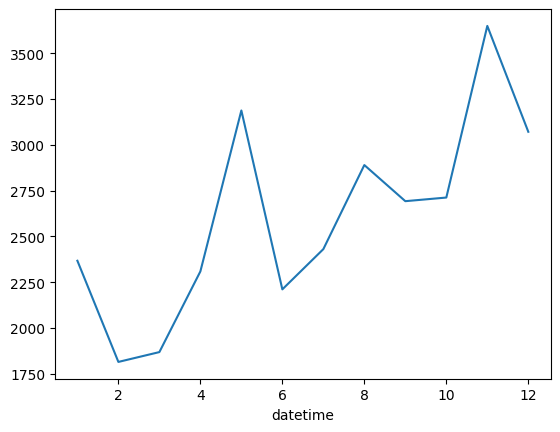

In [50]:
short_sa_forest_fires_athensvoice_df['text'].str.len().groupby(by=short_sa_forest_fires_athensvoice_df.index.month).mean().plot()

Με resample()

Με το resample μπορούμε να κάνουμε πολλά πράγματα: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

<ipython-input-51-1e19392e56df>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_sa_forest_fires_athensvoice_df['text'].str.len().resample('M').mean().plot()


<Axes: xlabel='datetime'>

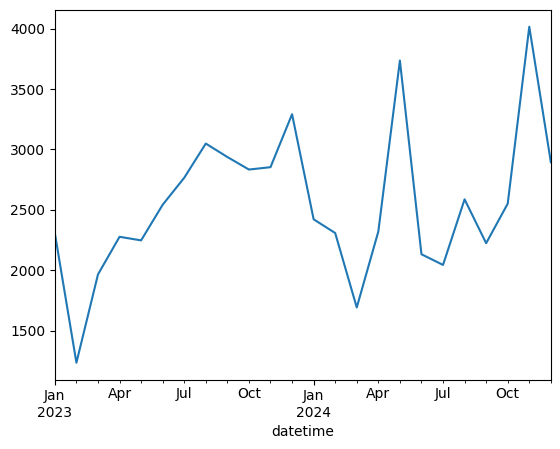

In [51]:
short_sa_forest_fires_athensvoice_df['text'].str.len().resample('M').mean().plot()

**Μετράμε το πλήθος των άρθρων ανά μήνα**

<ipython-input-52-2d0c1b59474e>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_sa_forest_fires_athensvoice_df['text'].resample('M').count().plot(kind='barh')


<Axes: ylabel='datetime'>

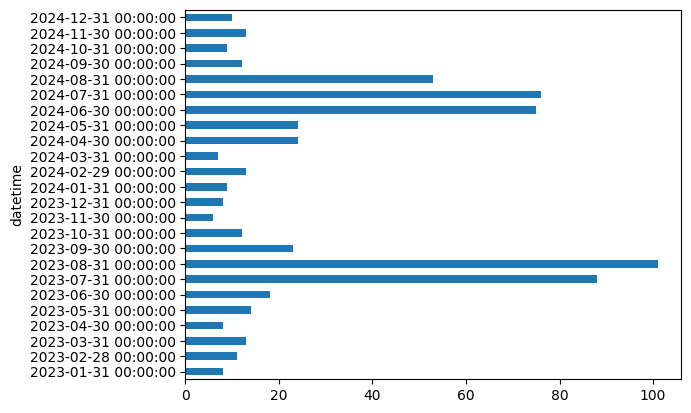

In [52]:
short_sa_forest_fires_athensvoice_df['text'].resample('M').count().plot(kind='barh')

**Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά μήνα**

<Axes: xlabel='datetime'>

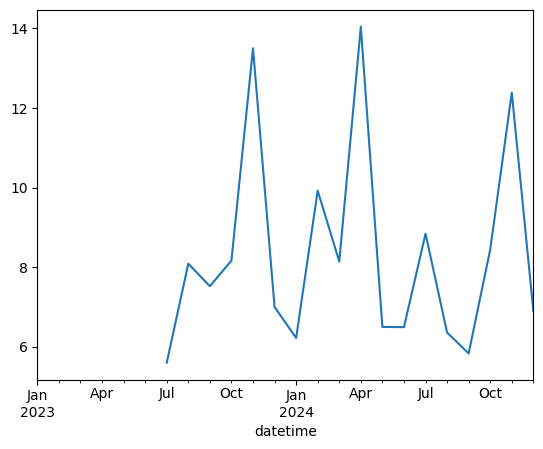

In [55]:
short_sa_forest_fires_athensvoice_df['fear'].resample('ME').mean().plot()

In [56]:
short_sa_forest_fires_athensvoice_df.sort_index().head(10)

,index,date_dt,time_dt,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,,,
2023-01-03 19:57:00,740,2023-01-03,19:57:00,Μαζικές θανατώσεις πουλερικών στην Τσεχία - Σε...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 11:55:00,739,2023-01-08,11:55:00,Ανοίγουν αύριο τα σχολεία χωρίς υποχρεωτική μά...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 23:24:58,738,2023-01-08,23:24:58,Μαζικές συλλήψεις στη Βραζιλία μετά την εισβολ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-09 13:23:00,737,2023-01-09,13:23:00,Με λουλούδια και μάσκες υποδέχονται τους Κινέζ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-11 19:33:40,736,2023-01-11,19:33:40,ΤΧΣ: Οι βασικές αρχές της στρατηγικής αποεπένδ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-16 11:29:00,735,2023-01-16,11:29:00,Το Κρεμλίνο αρνείται την επίθεση στην Ντνίπρο...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-17 08:37:00,734,2023-01-17,08:37:00,Υπό έλεγχο πυρκαγιά σε διαμέρισμα στο Αιγάλεω ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-25 08:09:14,733,2023-01-25,08:09:14,Υπό έλεγχο τέθηκε πυρκαγιά σε χώρο εργοστασίου...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-03 18:37:00,732,2023-02-03,18:37:00,Πύρινη κόλαση στη Χιλή - Ανεξέλεγκτες οι δασικ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#το έλενξα για να δω γιατί δεν έμφανιζει τιμές στα συναισθήματα για τους πρώτους 6 μήνες του έτους 2023, γιατί έχω πρόβλημα στα γραφήματα.

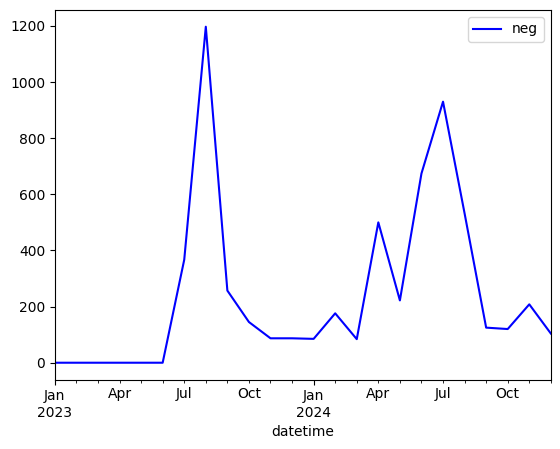

In [58]:
short_sa_forest_fires_athensvoice_df['negative'].resample('ME').sum().plot(color = 'b',label = 'neg').legend()

Αν έχουμε μεγάλη timeseries μπορούμε να μεγαλώσουμε το μήκος του γρφήματος

<Axes: xlabel='datetime'>

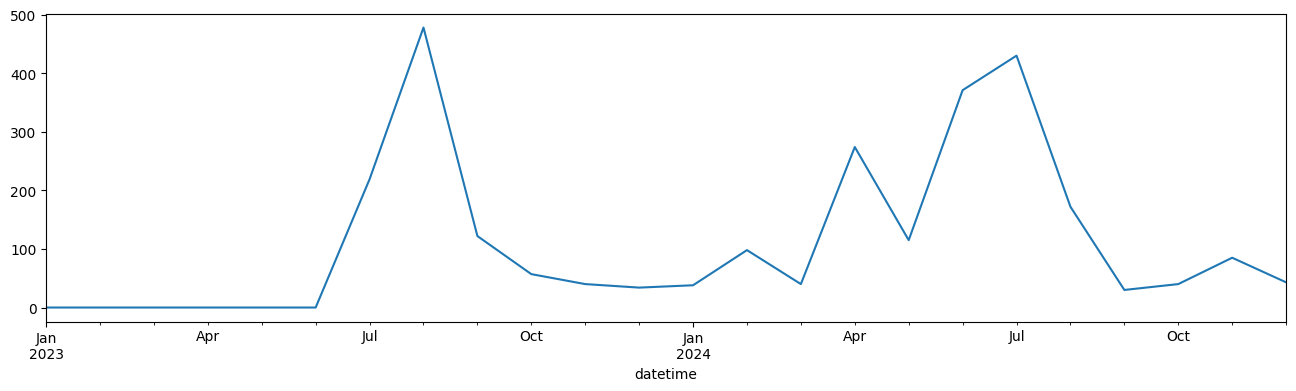

In [60]:
short_sa_forest_fires_athensvoice_df['anger'].resample('ME').sum().plot(figsize=(16,4))

Μπορούμε να εμφανίσουμε πολλά linecharts στο ίδιο γράφημα

<Axes: xlabel='datetime'>

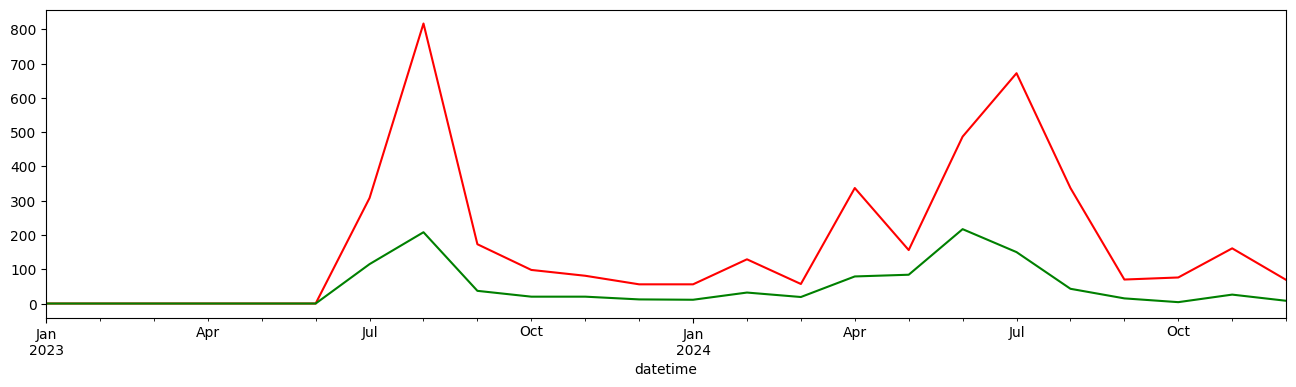

In [61]:
ax = short_sa_forest_fires_athensvoice_df['fear'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_sa_forest_fires_athensvoice_df['joy'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='datetime'>

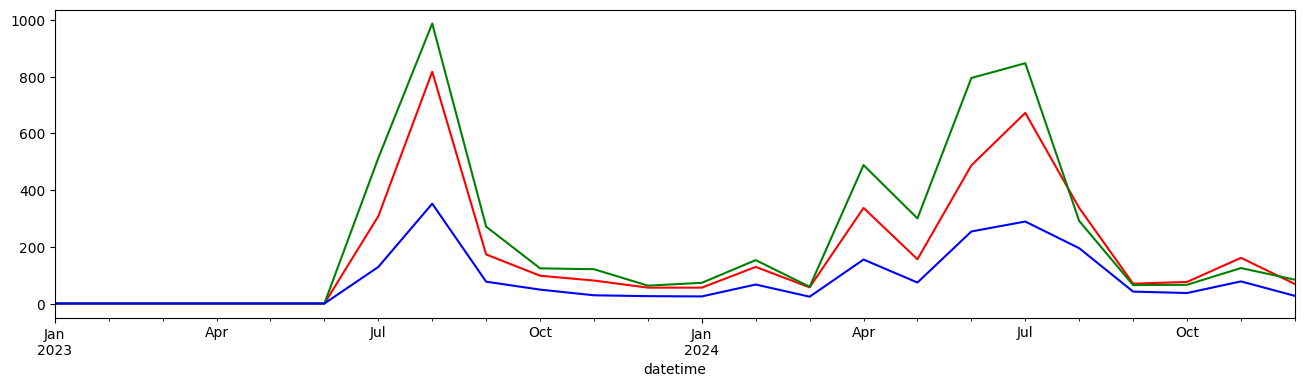

In [62]:
ax = short_sa_forest_fires_athensvoice_df['fear'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_sa_forest_fires_athensvoice_df['positive'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_sa_forest_fires_athensvoice_df['sadness'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

Μπορούμε να χρησιμοποιήσουμε διαφορετικό style για τα γραφήματα.

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [63]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [71]:
#plt.style.use('classic')
# plt.style.use('ggplot')
# plt.style.use('Solarize_Light2')
plt.style.use('seaborn-v0_8-bright')

In [ ]:
#τα δοκίμασα τα διαφορετικά στυλ αλλά δεν μου αλλάζει το στυλ

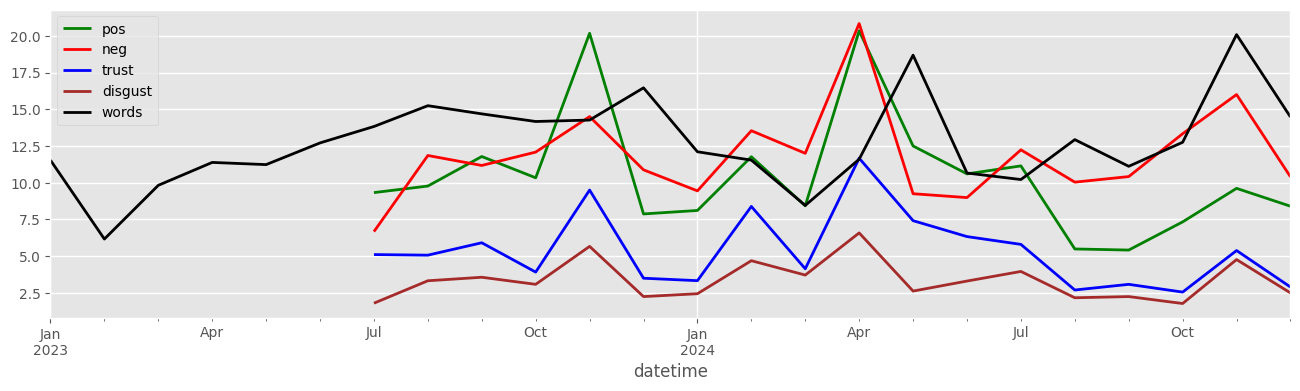

In [72]:
ax = short_sa_forest_fires_athensvoice_df['positive'].resample('ME').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_sa_forest_fires_athensvoice_df['negative'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_sa_forest_fires_athensvoice_df['trust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_sa_forest_fires_athensvoice_df['disgust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_sa_forest_fires_athensvoice_df['text'].str.len().resample('ME').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

**ΠΑΡΑΤΗΡΗΣΕΙΣ** (και λίγη θεωρία)

Θα προσέξατε ότι παρά τις μικροδιαφοροποιήσεις τους, οι γραμμές της θετικότητας/αρνητικότητας και των συναισθημάτων ανεβοκατεβαίνουν όλες μαζί στις διάφορες μέρες. Αυτό συμβαίνει γιατί αυτό που μετριέται είναι η συχνότητα (αριθμός εμφανίσεων) των αντίστοιχων λέξεων/φράσεων. Οι γραμμές αυτές ακολουθούν στο ανεβοκατέβασμα τον αριθμό λέξεων των άρθρων ανά ημέρα.

Ακριβώς επειδή ένα άρθρο περισσότερων λέξεων θα έχει περισσότερες π.χ. θετικές αλλά και αρνητικές λέξεις, θά έχει περισσότερη **και θετικότητα και αρνητικότητα** από ένα άρθρο με λιγότερες λέξεις.

Επομένως, η σύγκριση των κειμένων π.χ. ως προς το polarity δεν μπορεί να γίνει με απλή σύγκριση των συχνοτήτων των λέξεων/φράσεων από άρθρο σε άρθρο.

Ένας τρόπος αξιόπιστης σύγκρισης είναι η σύγκριση των διαφορών π.χ. θετικότητας/αρνητικότητας.



<Axes: xlabel='datetime'>

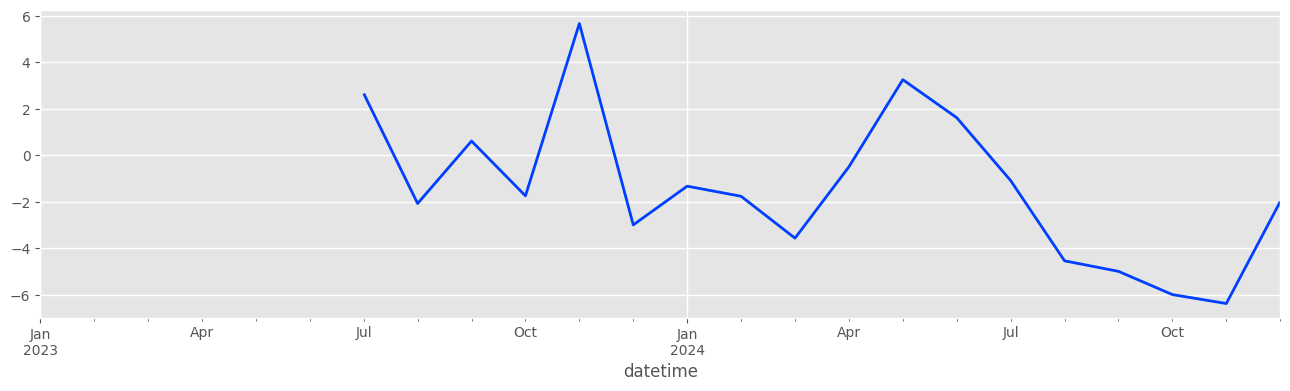

In [74]:
short_sa_forest_fires_athensvoice_df['pos/neg'] = short_sa_forest_fires_athensvoice_df['positive'] - short_sa_forest_fires_athensvoice_df['negative']
short_sa_forest_fires_athensvoice_df['pos/neg'].resample('ME').mean().plot(figsize=(16,4))

Το παραπάνω γράφημα μας δίνει μια καλύτερη εικόνα της διακύμανσης θετικότητας/αρνητικότητας στα άρθρα ανά ημέρα. Οι θετικές τιμές σημαίνουν ότι υπερτερεί η θετικότητα, ενώ οι αρνητικές ότι υπερτερεί η αρνητικότητα.

Με αυτο τον τρόπο έχουμε βρει ποιο είναι το polarity στα άρθρα ανά ημέρα, όμως ακόμα, η σύγκριση ανάμεσα στις μέρες, δηλαδή το να δούμε ποια μέρα έχουμε το μαγαλύτερο polarity είναι στρεβλή, γιατί η σύγκριση γίνεται με απόλυτους αριθμούς λέξεων/φράσεων.

Μπορούμε να ξεφύγουμε και από τη στρέβλωση των απόλυτων αριθμών που εξαρτώνται από το μέγεθος των κειμένων και να πάμε σε διαφορά των ποσοστών.

In [76]:
plt.style.use('grayscale')
# plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='datetime'>

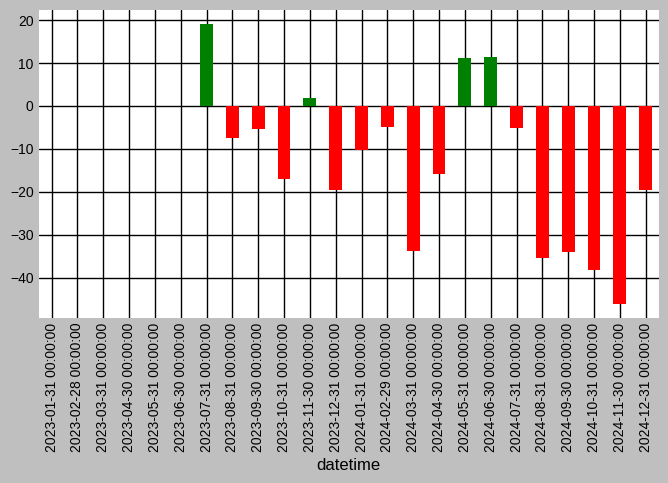

In [78]:
short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] = short_sa_forest_fires_athensvoice_df.positive*100//short_sa_forest_fires_athensvoice_df[['positive','negative']].sum(
        axis=1) - short_sa_forest_fires_athensvoice_df.negative*100//short_sa_forest_fires_athensvoice_df[['positive','negative']].sum(axis=1)

short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean().plot(kind='bar',
                                                                               color=(short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

### Ας εντοπίσουμε το άρθρο με τη μεγαλύτερη θετικότητα και το άρθρο με τη μεγαλύτερη αρνητικότητα

In [79]:
short_sa_forest_fires_athensvoice_df[(short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] == short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] == short_sa_forest_fires_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
datetime,,,,
2024-07-31 11:56:21,197,1.0,0.0,100.0
2024-07-15 06:51:00,238,3.0,0.0,100.0
2024-07-10 10:25:00,250,0.0,6.0,-100.0
2024-07-02 10:37:10,269,1.0,0.0,100.0
2024-06-27 06:01:15,283,1.0,0.0,100.0
2024-06-22 16:56:39,296,1.0,0.0,100.0
2024-06-21 04:34:33,306,3.0,0.0,100.0
2024-06-12 10:51:09,329,5.0,0.0,100.0
2024-05-22 09:20:12,358,2.0,0.0,100.0


Ποια είναι αυτά τα άρθρα;

In [80]:
sa_forest_fires_athensvoice_df.loc[[197,238,250], ['article_url','title', 'full_text']]

,article_url,title,full_text
197,https://www.athensvoice.gr/epikairotita/ellada...,Αλώβητο από την πυρκαγιά στο Κιλκίς το δάσος τ...,Αλώβητο από την πυρκαγιά στο Κιλκίς το δάσος τ...
238,https://www.athensvoice.gr/epikairotita/ellada...,Κορωνοϊός: Επιστρέφουν οι μάσκες και τα rapid ...,Κορωνοϊός: Επιστρέφουν οι μάσκες και τα rapid ...
250,https://www.athensvoice.gr/epikairotita/ellada...,"Πολύ υψηλός κίνδυνος πυρκαγιάς αύριο, Πέμπτη 1...","Πολύ υψηλός κίνδυνος πυρκαγιάς αύριο, Πέμπτη 1..."


Βλέπουμε ότι παρά την πολύ μικρή συχνότητα θετικών ή αρνητικών λέξεων, η εκτίμηση του polarity είναι αρκετά επιτυχής.

### Συναισθηματικά δίπολα

Όπως με το polarity που προκύπτει από το ζεύγος positivity/negativity, έτσι και τα 8 βασικά συναισθήματα κατηγοριοποιούνται σε 4 συναισθηματικά δίπολα:
- χαρά/λύπη,
- εμπιστοσύνη/αποστροφή,
- φόβος/θυμός,
- έκπληξη/προσμονή

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Plutchik-wheel.svg/800px-Plutchik-wheel.svg.png)

Εικόνα: Ο τροχός του Plutchik

Για την κατηγοριοποίηση των συναισθημάτων:
[Emotional classification](https://en.wikipedia.org/wiki/Emotion_classification)

Επομένως, με την τεχνική που εφαρμόσαμε στο polarity μπορούμε να υπολογίσουμε και το πρόσιμο του κάθε συναισθηματικού δίπολου και να εντοπίσουμε τα κείμενα με τη μεγαλύτερη συναισθηματική φόρτιση.